In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

# A

In [ ]:
def lagrange_interpolation(ps, fs):
    def polynome(x):
        basis = [np.prod([(x-p1)/(p-p1) for p1 in ps if p1 != p]) for p in ps]
        return np.dot(fs, basis)
    return polynome

In [9]:
def fsin(x):
    return x * np.sin(2*x)

In [12]:
def interpolation(n, f):
    nodes = np.arange(95, 105 + 10 / n, 10 / n)
    fs = [f(x) for x in nodes]
    return lagrange_interpolation(nodes, fs)

In [13]:
def plot(xs, ys):
    plt.plot(xs, ys)
    plt.show()
    

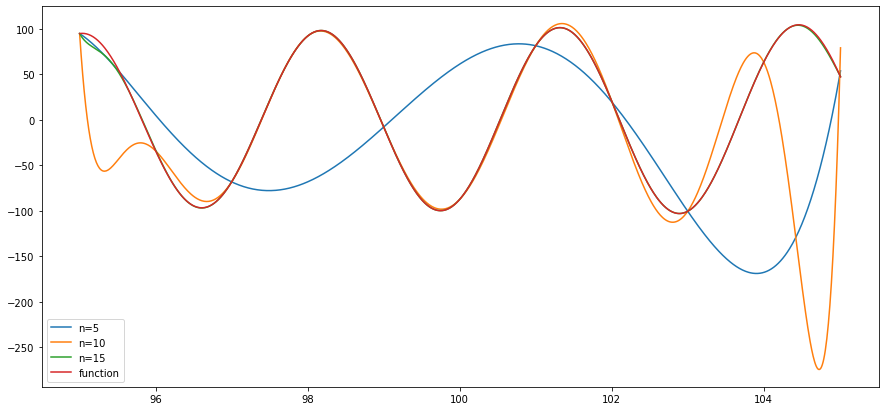

In [27]:
xs = np.arange(95, 105+0.01, 0.01)
pylab.rcParams['figure.figsize'] = 15, 7
for n in [5, 10, 15]:
    pol = interpolation(n, fsin)
    ys = [pol(x) for x in xs]
    pylab.plot(xs, ys, label="n={}".format(n))
pylab.plot(xs, [fsin(x) for x in xs], label="function")
pylab.legend()

error for n=5 is 247.65768162102415
error for n=10 is 365.0420193178308
error for n=15 is 11.448024729588553


Text(0.5, 1.0, 'error')

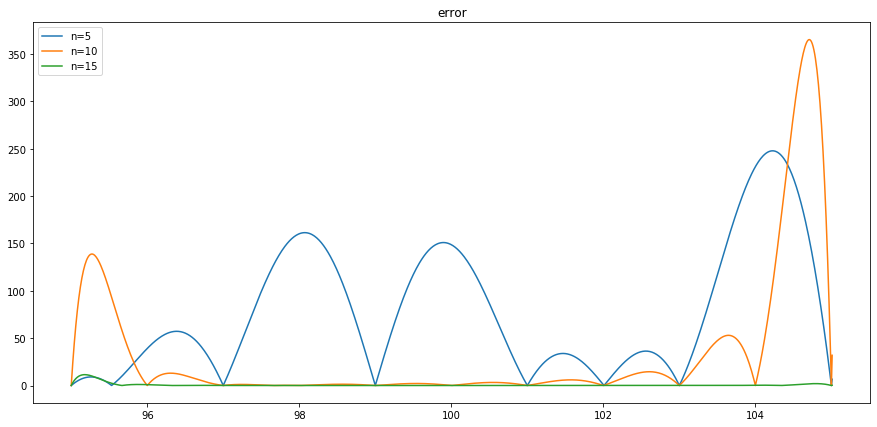

In [29]:
xs = np.arange(95, 105+0.01, 0.01)
fs = [fsin(x) for x in xs]
pylab.rcParams['figure.figsize'] = 15, 7
for n in [5, 10, 15]:
    pol = interpolation(n, fsin)
    ys = [pol(x) for x in xs]
    error = [np.abs(y - f ) for y, f in zip(ys, fs)]
    maxerror = np.max(error)
    pylab.plot(xs, error, label="n={}".format(n))
    print("error for n={} is {}".format(n, maxerror))
pylab.legend()
pylab.title("error")

Известно, что при большом количестве узлов, коэффиценты многочленов растут. При х порядка 100 большие степени дают очень большие значения, и сумма получается нестабильной

# B

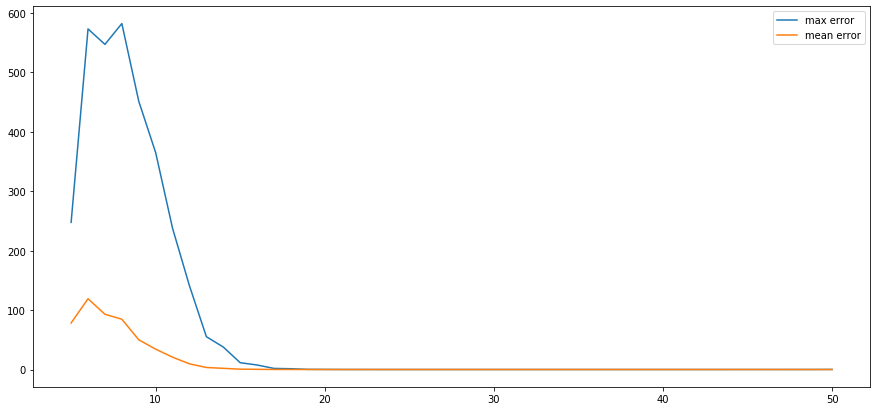

In [32]:
xs = np.arange(95, 105+0.01, 0.01)
fs = [fsin(x) for x in xs]
pylab.rcParams['figure.figsize'] = 15, 7
maxs = []
means = []
for n in range(5, 51):
    pol = interpolation(n, fsin)
    ys = [pol(x) for x in xs]
    error = [np.abs(y - f ) for y, f in zip(ys, fs)]
    maxerror = np.max(error)
    meanerror = np.mean(error)
    maxs.append(maxerror)
    means.append(meanerror)
pylab.plot(range(5, 51), maxs, label="max error")
pylab.plot(range(5, 51), means, label="mean error")
pylab.legend()

# C

In [94]:
def interpolation_cheb(n, f):
    nodes_unit = [np.cos(np.pi / 2 * (2 * i - 1) / n) for i in range(1, n + 1)]
    nodes = 5 * np.array(nodes_unit) + 100
    fs = [f(x) for x in nodes]
    return lagrange_interpolation(nodes, fs)

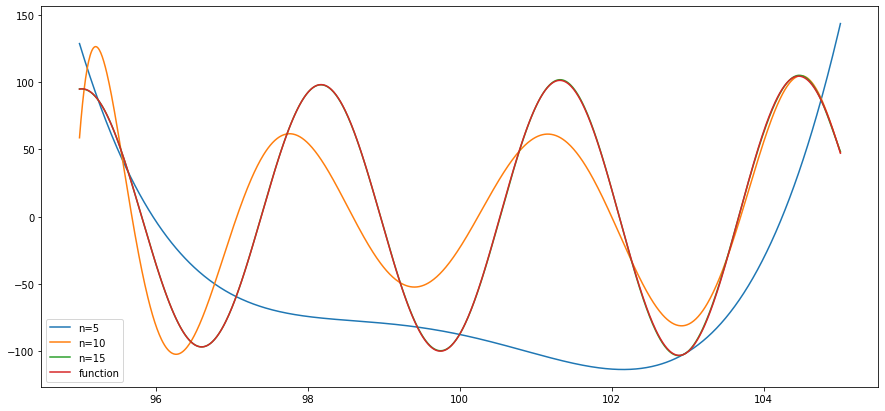

In [95]:
xs = np.arange(95, 105+0.01, 0.01)
pylab.rcParams['figure.figsize'] = 15, 7
for n in [5, 10, 15]:
    pol = interpolation_cheb(n, fsin)
    ys = [pol(x) for x in xs]
    pylab.plot(xs, ys, label="n={}".format(n))
pylab.plot(xs, [fsin(x) for x in xs], label="function")
pylab.legend()

error for n=5 is 207.98470060896597
error for n=10 is 68.13820886081837
error for n=15 is 1.2315019601911885


Text(0.5, 1.0, 'error')

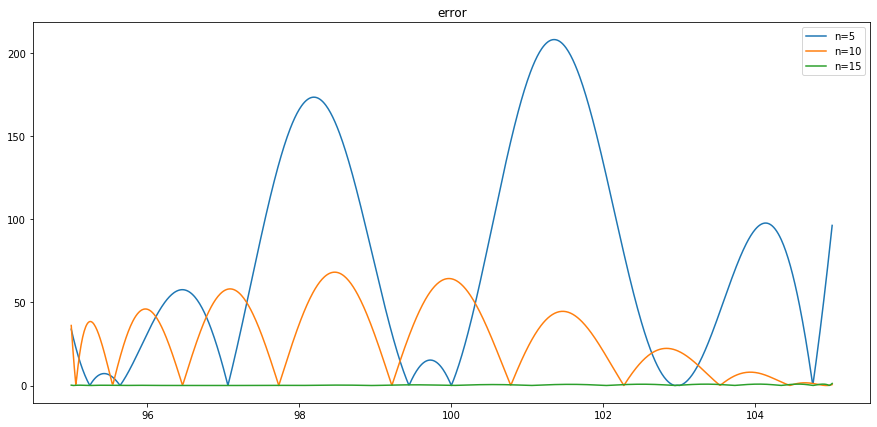

In [96]:
xs = np.arange(95, 105+0.01, 0.01)
fs = [fsin(x) for x in xs]
pylab.rcParams['figure.figsize'] = 15, 7
for n in [5, 10, 15]:
    pol = interpolation_cheb(n, fsin)
    ys = [pol(x) for x in xs]
    error = [np.abs(y - f ) for y, f in zip(ys, fs)]
    maxerror = np.max(error)
    pylab.plot(xs, error, label="n={}".format(n))
    print("error for n={} is {}".format(n, maxerror))
pylab.legend()
pylab.title("error")

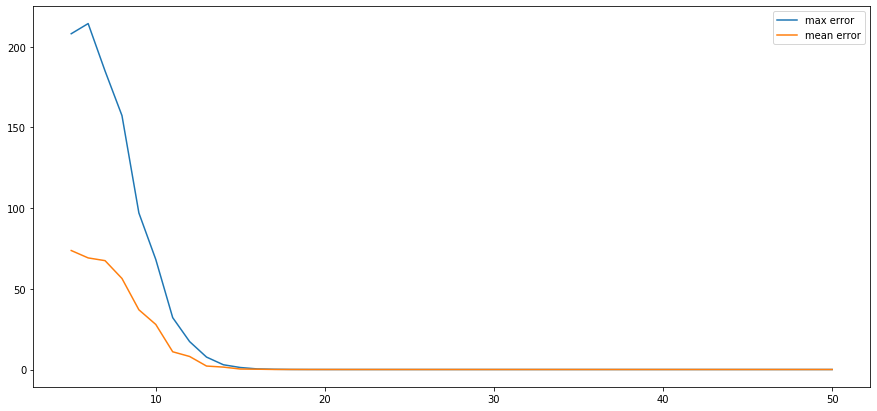

In [44]:
xs = np.arange(95, 105 + 0.01, 0.01)
fs = [fsin(x) for x in xs]
pylab.rcParams['figure.figsize'] = 15, 7
maxs = []
means = []
for n in range(5, 51):
    pol = interpolation_cheb(n, fsin)
    ys = [pol(x) for x in xs]
    error = [np.abs(y - f) for y, f in zip(ys, fs)]
    maxerror = np.max(error)
    meanerror = np.mean(error)
    maxs.append(maxerror)
    means.append(meanerror)
pylab.plot(range(5, 51), maxs, label="max error")
pylab.plot(range(5, 51), means, label="mean error")
pylab.legend()

Видно, что и максимальная и средняя погрешность меньше

# D

In [ ]:
def klin(x):
    return np.abs(x-1)

In [64]:
def interpolation(n, f):
    nodes = np.arange(0, 2 + 2 / n,  1/ n)
    fs = [f(x) for x in nodes]
    return lagrange_interpolation(nodes, fs)

In [66]:
def interpolation_cheb(n, f):
    nodes_unit = [np.cos(np.pi / 2 * (2 * i - 1) / n) for i in range(1, n + 1)]
    nodes = np.array(nodes_unit) + 1
    fs = [f(x) for x in nodes]
    return lagrange_interpolation(nodes, fs)

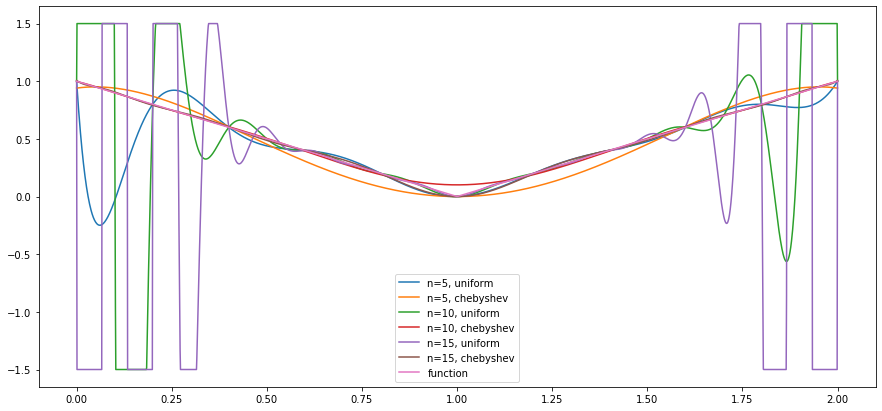

In [75]:
xs = np.arange(0, 2+0.001, 0.001)
pylab.rcParams['figure.figsize'] = 15, 7
for n in [5, 10, 15]:
    pol = interpolation(n, klin)
    ys = [pol(x) for x in xs]
    ys = [min(abs(y), 1.5)*np.sign(y) for y in ys]
    pylab.plot(xs, ys, label="n={}, uniform".format(n))
    pol = interpolation_cheb(n, klin)
    ys = [pol(x) for x in xs]
    ys = [min(abs(y), 1.5)*np.sign(y) for y in ys]
    pylab.plot(xs, ys, label="n={}, chebyshev".format(n))
pylab.plot(xs, [klin(x) for x in xs], label="function")
pylab.legend()

error for n=5 is 1.1891316981921158, uniform
error for n=10 is 179.66820350220283, uniform
error for n=15 is 60748.273969721005, uniform
error for n=5 is 0.12317550557973977, chebyshev
error for n=10 is 0.10124651257880027, chebyshev
error for n=15 is 0.03993504782637026, chebyshev


Text(0.5, 1.0, 'error')

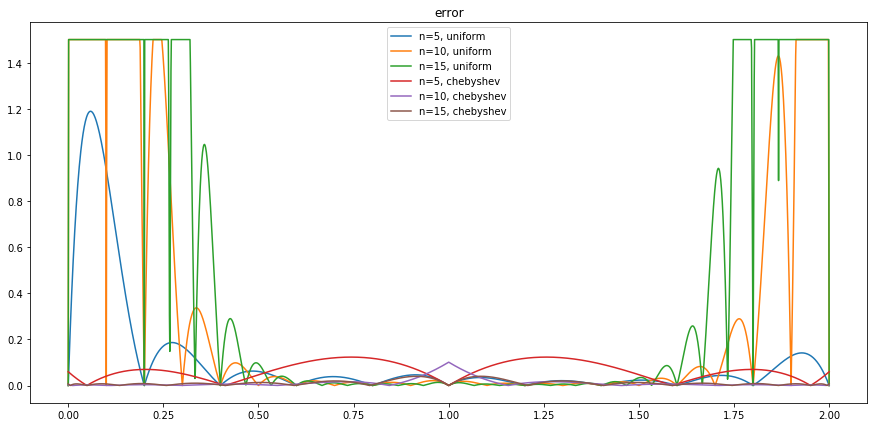

In [77]:
xs = np.arange(0, 2+0.001, 0.001)
fs = [klin(x) for x in xs]
pylab.rcParams['figure.figsize'] = 15, 7
for n in [5, 10, 15]:
    pol = interpolation(n, klin)
    ys = [pol(x) for x in xs]
    error = [np.abs(y - f ) for y, f in zip(ys, fs)]
    maxerror = np.max(error)
    error = [min(abs(y), 1.5)*np.sign(y) for y in error]
    pylab.plot(xs, error, label="n={}, uniform".format(n))
    print("error for n={} is {}, uniform".format(n, maxerror))
for n in [5, 10, 15]:
    pol = interpolation_cheb(n, klin)
    ys = [pol(x) for x in xs]
    error = [np.abs(y - f ) for y, f in zip(ys, fs)]
    maxerror = np.max(error)
    error = [min(abs(y), 1.5)*np.sign(y) for y in error]
    pylab.plot(xs, error, label="n={}, chebyshev".format(n))
    print("error for n={} is {}, chebyshev".format(n, maxerror))
pylab.legend()
pylab.title("error")

In [86]:
xs = np.arange(0, 2+0.01, 0.01)
fs = [klin(x) for x in xs]
pylab.rcParams['figure.figsize'] = 15, 7
maxs1 = []
means1 = []
for n in range(5, 51):
    pol = interpolation(n, klin)
    ys = [pol(x) for x in xs]
    error = [np.abs(y - f) for y, f in zip(ys, fs)]
    maxerror = np.max(error)
    meanerror = np.mean(error)
    maxs1.append(maxerror)
    means1.append(meanerror)
maxs2 = []
means2 = []
for n in range(5, 51):
    pol = interpolation_cheb(n, klin)
    ys = [pol(x) for x in xs]
    error = [np.abs(y - f) for y, f in zip(ys, fs)]
    maxerror = np.max(error)
    meanerror = np.mean(error)
    maxs2.append(maxerror)
    means2.append(meanerror)


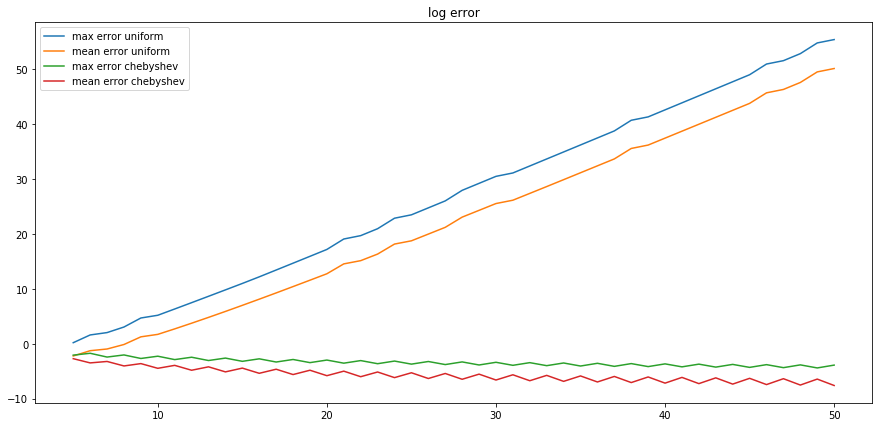

In [92]:
pylab.plot(np.arange(5, 51), np.log(maxs1), label="max error uniform")
pylab.plot(np.arange(5, 51), np.log(means1), label="mean error uniform")

pylab.plot(np.arange(5, 51), np.log(maxs2), label="max error chebyshev")
pylab.plot(np.arange(5, 51), np.log(means2), label="mean error chebyshev")

pylab.title("log error")
pylab.legend()